# Problem Statement: Mobile Price Prediction

Problem Statement

Market size of mobile phones if growing everyday and so is the competition. To capture the maximurn market electronics companies try to make improvements in their products. However, sales of mobile phones depend on various factors like demand, technology, marketing, brand, availability, user experience, service, price, etc. As we understand that selling price makes a huge difference when it comes to sales and profits. Estimating an optimal price for a new mobile phone can be a tricky task especially when you are new in the business or when you want to launch a new kind of mobile phone in the market

As part of this exercise we will try various similar companies. to estimate the price range for a given mobile phone using given feature information. These details are collected from

Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

4.1 Understanding the Dataset

4.1.1-Data Types

4.1.2 Summary Statistics

4.1.3- Missing Values

4.1.3-Missing Values

4.1.4- Correlation

4.1.5-Discover Outliers with Visualization

4.1.6-Visualizing features having strongest relation with target variable 5. Logistic Regression



# 1. Import Libraries

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
sns.set()

# 2. Setting options

In [28]:
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None)  
pd.set_option('display.float_format', '{:.7f}'.format)  

# 3. Read Data

In [29]:
df = pd.read_csv("Mobile.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2000000,0,1,0,7,0.6000000,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5000000,1,0,1,53,0.7000000,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5000000,1,2,1,41,0.9000000,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5000000,0,0,0,10,0.8000000,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2000000,0,13,1,44,0.6000000,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# 4. Data Analysis and Preparation

## 4.1 Understanding the Dataset


In [30]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2000000,0,1,0,7,0.6000000,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5000000,1,0,1,53,0.7000000,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5000000,1,2,1,41,0.9000000,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5000000,0,0,0,10,0.8000000,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2000000,0,13,1,44,0.6000000,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### 4.1.1-Data Types

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<Axes: >

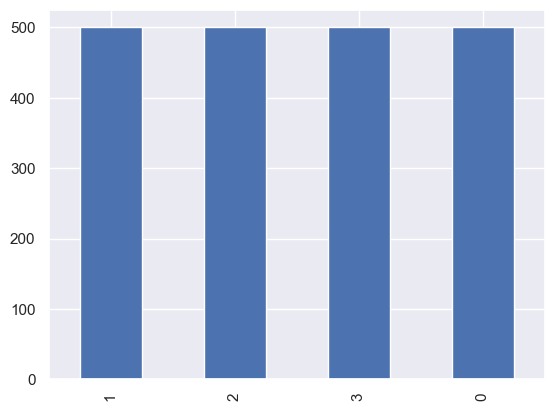

In [32]:
df['price_range'].value_counts().plot(kind='bar')

### 4.1.2 Summary Statistics


In [33]:
df.shape

(2000, 21)

In [34]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000
mean,1238.5185000,0.4950000,1.5222500,0.5095000,4.3095000,0.5215000,32.0465000,0.5017500,140.2490000,4.5205000,9.9165000,645.1080000,1251.5155000,2124.2130000,12.3065000,5.7670000,11.0110000,0.7615000,0.5030000,0.5070000,1.5000000
std,439.4182061,0.5001000,0.8160042,0.5000348,4.3414437,0.4996625,18.1457150,0.2884155,35.3996549,2.2878367,6.0643149,443.7808108,432.1994469,1084.7320436,4.2132450,4.3563976,5.4639552,0.4262729,0.5001160,0.5000760,1.1183136
min,501.0000000,0.0000000,0.5000000,0.0000000,0.0000000,0.0000000,2.0000000,0.1000000,80.0000000,1.0000000,0.0000000,0.0000000,500.0000000,256.0000000,5.0000000,0.0000000,2.0000000,0.0000000,0.0000000,0.0000000,0.0000000
25%,851.7500000,0.0000000,0.7000000,0.0000000,1.0000000,0.0000000,16.0000000,0.2000000,109.0000000,3.0000000,5.0000000,282.7500000,874.7500000,1207.5000000,9.0000000,2.0000000,6.0000000,1.0000000,0.0000000,0.0000000,0.7500000
50%,1226.0000000,0.0000000,1.5000000,1.0000000,3.0000000,1.0000000,32.0000000,0.5000000,141.0000000,4.0000000,10.0000000,564.0000000,1247.0000000,2146.5000000,12.0000000,5.0000000,11.0000000,1.0000000,1.0000000,1.0000000,1.5000000
75%,1615.2500000,1.0000000,2.2000000,1.0000000,7.0000000,1.0000000,48.0000000,0.8000000,170.0000000,7.0000000,15.0000000,947.2500000,1633.0000000,3064.5000000,16.0000000,9.0000000,16.0000000,1.0000000,1.0000000,1.0000000,2.2500000
max,1998.0000000,1.0000000,3.0000000,1.0000000,19.0000000,1.0000000,64.0000000,1.0000000,200.0000000,8.0000000,20.0000000,1960.0000000,1998.0000000,3998.0000000,19.0000000,18.0000000,20.0000000,1.0000000,1.0000000,1.0000000,3.0000000


### 4.1.3- Missing Values


In [35]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### 4.1.4- Correlation


<Axes: >

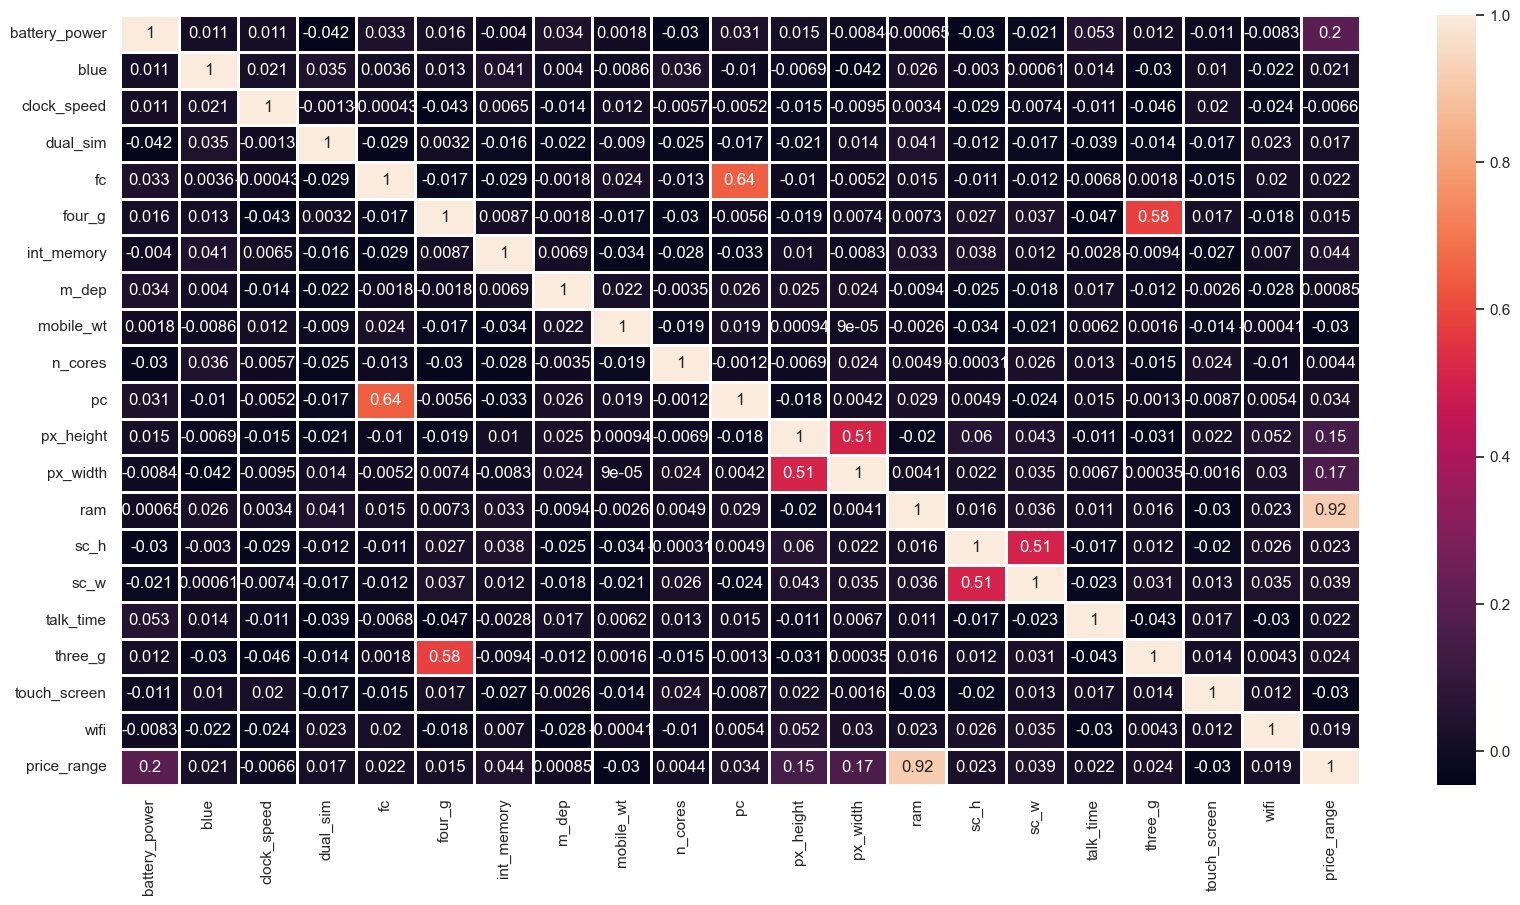

In [36]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot =True,linewidths=1)

### 4.1.5-Discover Outliers with Visualization


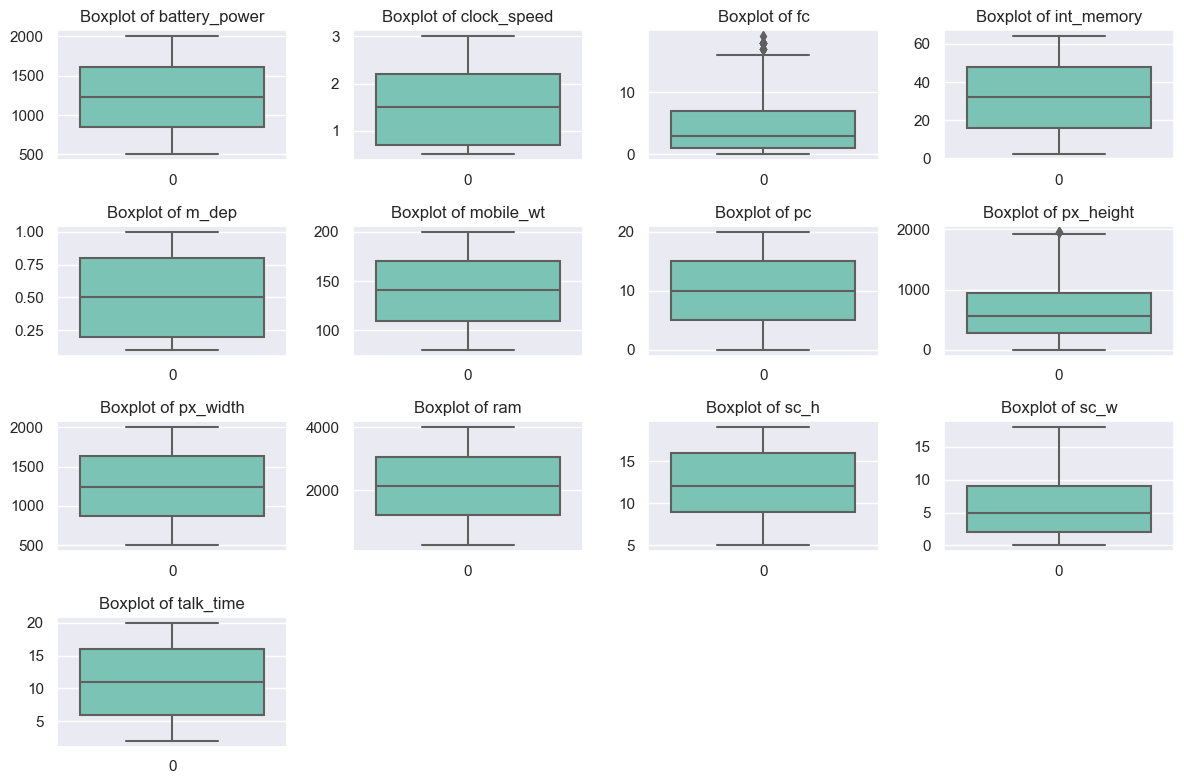

In [37]:
numeric_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
plt.figure(figsize=(12, 8))

for idx, col in enumerate(numeric_columns):
    plt.subplot(4, 4, idx+1) 
    sns.boxplot(data=df[col], color='#6fcfbc')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


### 4.1.6-Visualizing features having strongest relation with target variable

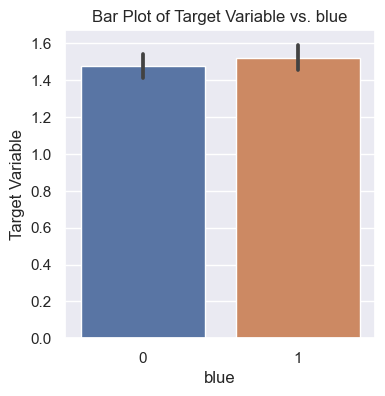

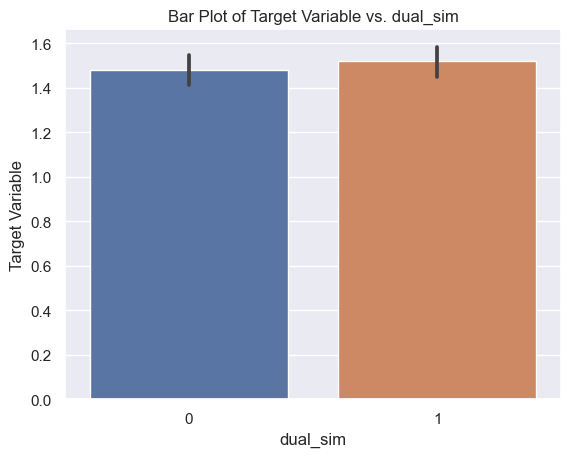

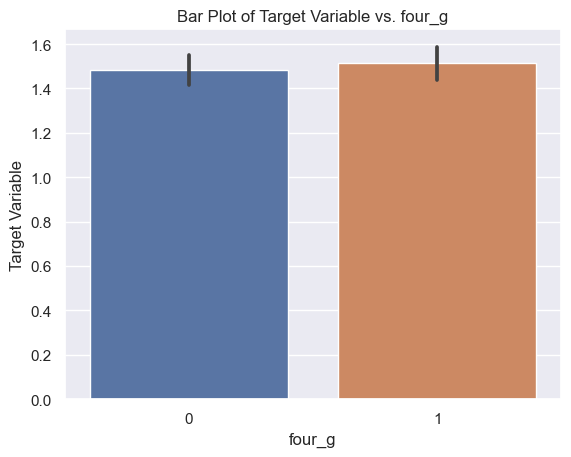

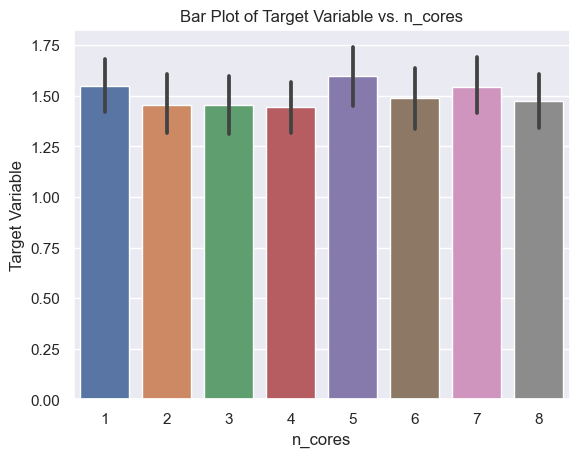

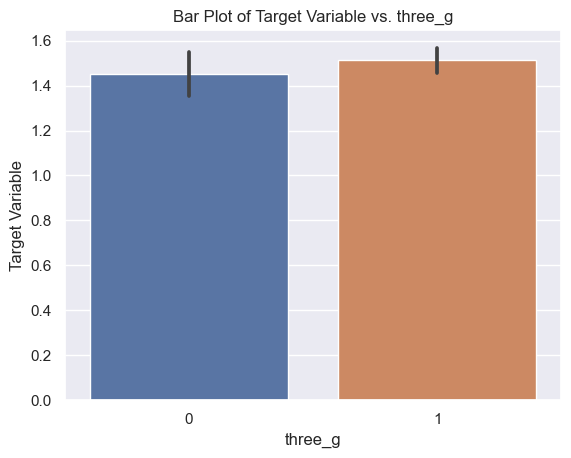

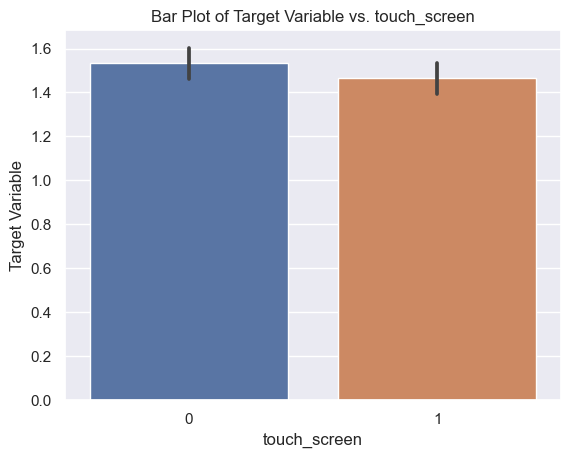

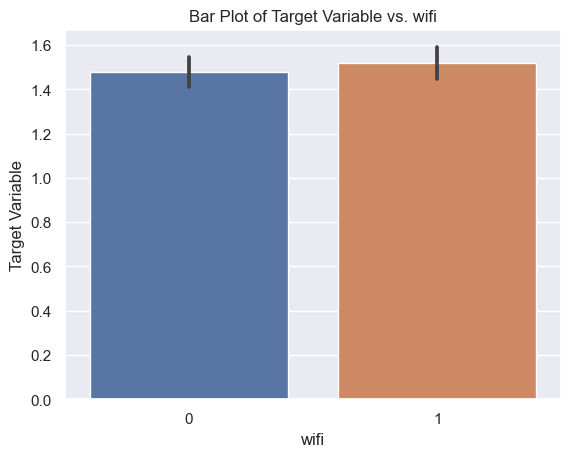

In [50]:
categorical_columns = [
    'blue', 'dual_sim', 'four_g', 'n_cores', 'three_g',
    'touch_screen', 'wifi'
]

# Create individual bar plots for each categorical feature
plt.figure(figsize=(4,4))

for feature in categorical_columns:
    sns.barplot(x=feature, y="price_range", data=df)
    plt.title(f"Bar Plot of Target Variable vs. {feature}")
    plt.xlabel(feature)
    plt.ylabel("Target Variable")
    plt.show()

# 5. Logistic Regression


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

acc = accuracy_score(y_test, y_pred) 
print("Accuracy of the Logistic Regression Model: ",acc)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[102   3   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   1 111]]
Accuracy of the Logistic Regression Model:  0.9775
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.95      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

